# Real Harmonic Oscillator Data

## Description

This exercise is about more advanced fitting of data, specifically **starting with a simple fit and building a more advanced one**.

The idea is to begin with the simplest possible function that even remotely does the job, which is then expanded to accommodate all the features present in the data fitted. The data is from three versions of a damped harmonic oscillator, consisting of a weight hanging from a spring, but with different damping:
- No additional damping.
- More damping from a round piece of cardboard, which increases the drag (most interesting dataset!).
- Damping from friction of the weight against metal.


## Functional form of a damped harmonic oscillator:

The function to fit the overall 1st and 2nd case with is known in physics as the damped harmonic oscillator, where position $p$ as a function of time $t$ behaves as:

$$p(t) = A \gamma \cdot\sin(\omega t+\phi) \cdot\exp(-\gamma t)$$

The 3rd case is a little different, as should become clear once plotted.


## Your task

Take a look at the various dataset, and try to fit them with an appropriate function. The first challenge is to get the fit working at all. Once this is in place, considering the patterns in the fit residuals should give you an idea of what to further include in the fit. Play around with various possible additions to the function, discussing with your peers. Remember to try to fit all three datasets.


##  Authors: 
- Troels Petersen ([email](mailto:petersen@nbi.dk))

## Date
28th of December 2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit, cost
from scipy import stats

import matplotlib.gridspec as gridspec                          # For unequal plot boxes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes    # For insert plots
import warnings
warnings.filterwarnings("ignore")

In [2]:
SavePlots = False
verbose = True
Nverbose = 10

---
## 1st Dataset - no additional damping

In [3]:
filename = "data_HarmOsc1.txt"
    
# Load time and position, set starting time to 0, and assign uncertainty:
time, position = np.loadtxt(filename, unpack=True)
time -= time[0]
eposition = np.ones_like(position)*0.0037        # Assigning an estimated uncertainty from a calibration with no swings.

# Check loaded data:
if verbose :
    for i in range(Nverbose) :
        print("  Time = %6.3f    Position = %6.3f "%(time[i], position[i]))
print("  Number of entries read: %d    Time of last read: %6.3f"%(len(time), time[-1]))

# Sanity check (Did you check the data?):
for i in np.where((time < -0.001) | (time > 100.0) | (position < -5.0) | (position > 5.0))[0] :
    print("Warning: Strange value for time and/or dist!", i, time[i], position[i])

  Time =  0.000    Position = -0.683 
  Time =  0.010    Position = -0.694 
  Time =  0.020    Position = -0.702 
  Time =  0.030    Position = -0.699 
  Time =  0.040    Position = -0.702 
  Time =  0.050    Position = -0.691 
  Time =  0.060    Position = -0.684 
  Time =  0.070    Position = -0.669 
  Time =  0.080    Position = -0.644 
  Time =  0.090    Position = -0.609 
  Number of entries read: 3806    Time of last read: 38.050


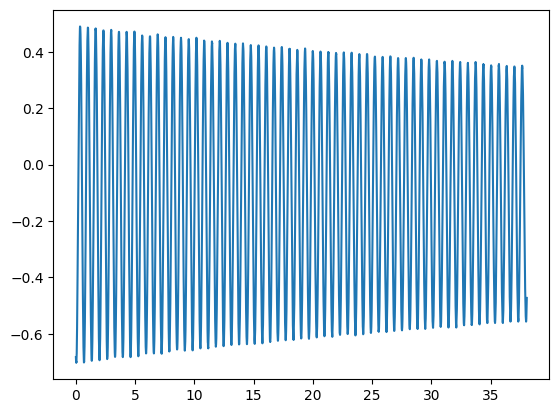

In [4]:
plt.plot(time,position)

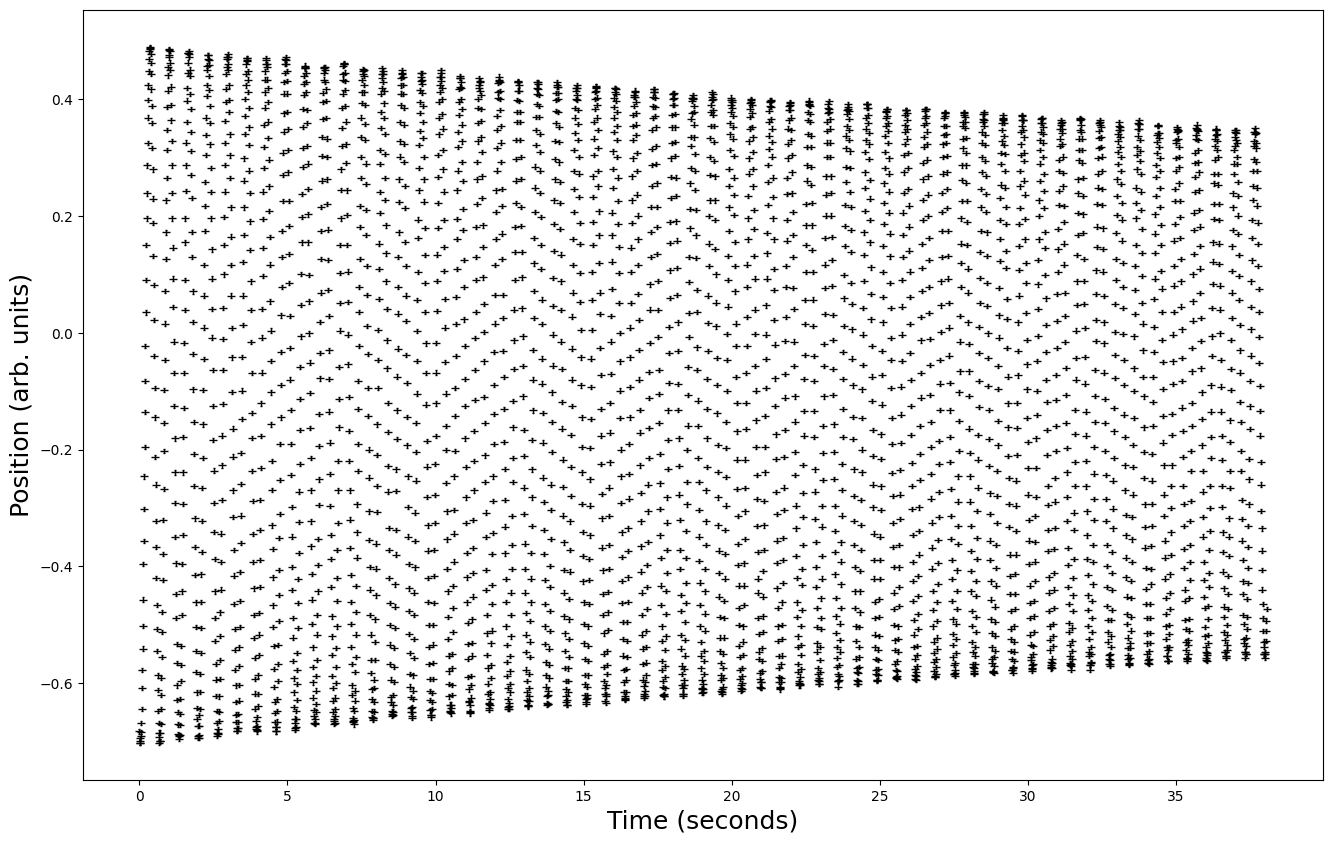

In [5]:
# Plot the data:
fig1, ax1 = plt.subplots(figsize=(16, 10))
# ax1 = fig1.add_axes((0.1, 0.3, 0.8, 0.6))    # Add the top subfigure
ax1.errorbar(time, position, eposition, fmt='k_', label='data', ecolor='k', elinewidth=1, capsize=1, capthick=1)
ax1.set_xlabel("Time (seconds)", fontsize=18)
ax1.set_ylabel("Position (arb. units)", fontsize=18)
#ax1.set_ylim(top=ax1.get_ylim()[1]*2.5)
fig1.tight_layout;

In [6]:
# First fit function is a (initially too) simple harmonic oscillator:
def func_sho1(x, A, omega, phi, c) :
    return A * np.cos(omega*x + phi) + c

In [7]:
# Fit the data:
tmax = 5.0                              # Maximum of time range fitted
mask = time < tmax
cfit = cost.LeastSquares(time[mask], position[mask], eposition[mask], func_sho1)
mfit = Minuit(cfit, A=50, omega=10.0, phi=-1.0, c=0)
mfit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1438 (χ²/ndof = 2.9)       │              Nfcn = 203              │
│ EDM = 8.65e-05 (Goal: 0.0002)    │            time = 0.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A     │ 584.81e-3 │  0.23e-3  │            │            │         │         │       │
│ 1 │ omega │  9.59780  │  0.00028  │            │            │         │         │       │
│ 2 │ phi   │  2.8424   │  0.0008   │            │            │         │         │       │
│ 3 │ c     │-105.61e-3 │  0.17e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────┐
│       │         A     omega       phi         c │
├───────┼─────────────────────────────────────────┤
│     A │  5.39e-08        -0         0        -0 │
│ omega │        -0  8.07e-08  -0.20e-6         0 │
│   phi │         0  -0.20e-6  6.56e-07 -0.004e-6 │
│     c │        -0         0 -0.004e-6  2.75e-08 │
└───────┴─────────────────────────────────────────┘

Text(0, 0.5, 'Residual Position')

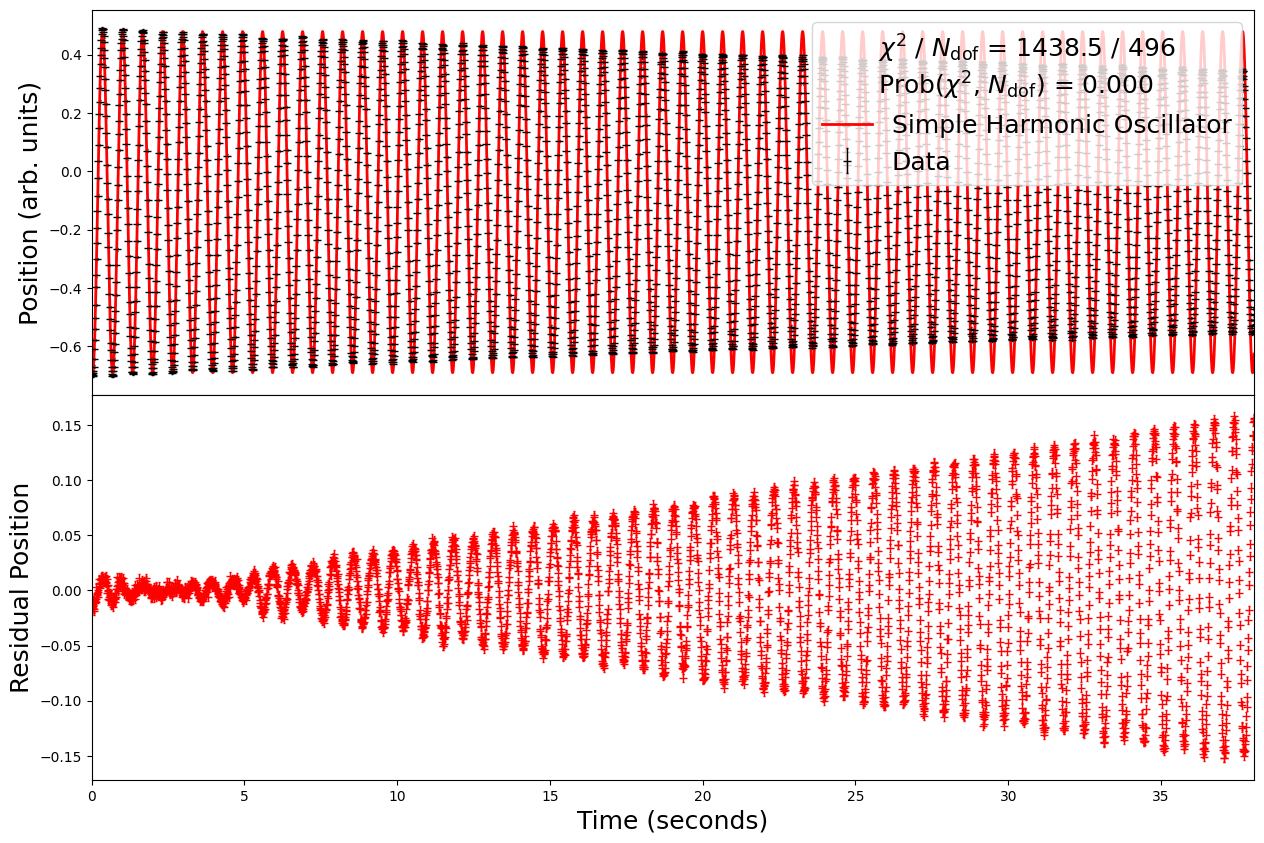

In [8]:
chi2 = mfit.fval
ndof = len(time[mask])-len(mfit.values[:])
prob = stats.chi2.sf(chi2, ndof)

# Calculate residuals:
res_position = position - func_sho1(time, *mfit.values[:])

# Plot with common x-axis:
fig, axs = plt.subplots(2, 1, figsize=(15,10), sharex=True)
fig.subplots_adjust(hspace=0)       # Remove vertical space between Axes

# Main plot with fit on top:
axs[0].errorbar(time, position, eposition, fmt='k_', label='Data', ecolor='k', elinewidth=1, capsize=1, capthick=1)
axs[0].set_ylabel("Position (arb. units)", fontsize=18)
axs[0].set_xlim(time[0], time[-1])

# Draw the function on top of the data:
x_fit = np.linspace(0, tmax, 1000)
y_fit = func_sho1(x_fit, *mfit.values[:])
axs[0].plot(time, func_sho1(time, *mfit.values[:]), 'r', linewidth=2.0, label='Simple Harmonic Oscillator')

# Put fit info into plot:
fit_info = [f"$\\chi^2$ / $N_\\mathrm{{dof}}$ = {chi2:.1f} / {ndof}", f"Prob($\\chi^2$, $N_\\mathrm{{dof}}$) = {prob:.3f}",]
for p, v, e in zip(mfit.parameters, mfit.values[:], mfit.errors[:]) :
    Ndecimals = max(0,-np.int32(np.log10(e)-1-np.log10(2)))                                # Number of significant digits
axs[0].legend(title="\n".join(fit_info), fontsize=18, title_fontsize=18, alignment = 'center', loc='upper right');

# Residual plot:
axs[1].errorbar(time, res_position, eposition, fmt='r_', label='Residuals', ecolor='r', elinewidth=1, capsize=1, capthick=1)
axs[1].set_xlabel("Time (seconds)", fontsize=18)
axs[1].set_ylabel("Residual Position", fontsize=18)


0.4053776058561822


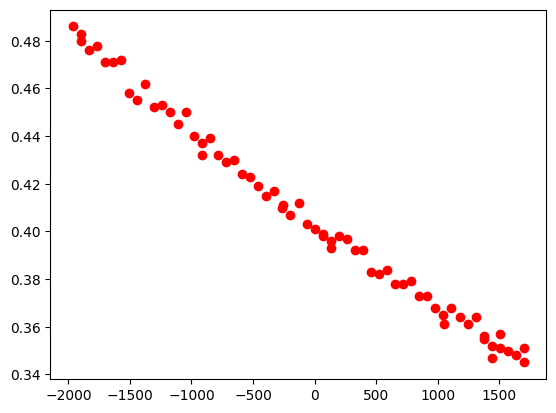

In [48]:
res_position = position #- func_sho1(time, *mfit.values[:])
import scipy
from scipy.signal import find_peaks
#plt.plot(res_position)
peakindex = find_peaks(res_position[100:],height = 0.1)[0]
peakposition = res_position[100:][peakindex]
plt.plot(peakindex-peakindex[int(len(peakindex)/2)],peakposition,'ro')
def linfunc(x,a,b):
    return a*x+b
cov2 = cost.LeastSquares(peakindex-peakindex[int(len(peakindex)/2)],peakposition,0.005,linfunc)
m2 = Minuit(cov2,a=0,b=0)
m2.migrad()
Amptime = m2.values[0]
Amp0 = m2.values[1]
print(Amp0)

In [96]:
def A_func(t,gamma):
    a = Amptime
    b = Amp0
    return a*np.exp(-gamma*t)+b
def func_shoimpro(x,gamma,omega, phi, c) :
    a = Amptime
    b = Amp0
    return A_func(x,gamma) * np.cos(omega*x + phi) + c
tmax = 10.0                              # Maximum of time range fitted
mask = time < tmax
cfit = cost.LeastSquares(time[mask], position[mask], eposition[mask], func_shoimpro)
mfit = Minuit(cfit,gamma = 1,omega=10.0, phi=-2.0, c=2)#,a = Amptime,b = Amp0)
mfit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.791e+07 (χ²/ndof = 12601.9)│              Nfcn = 231              │
│ EDM = 5.52e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ gamma │-273.205e-3│ 0.009e-3  │            │            │         │         │       │
│ 1 │ omega │ 10.070648 │ 0.000027  │            │            │         │         │       │
│ 2 │ phi   │  -4.8684  │  0.0007   │            │            │         │         │       │
│ 3 │ c     │-102.21e-3 │  0.06e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────┐
│       │    gamma    omega      phi        c │
├───────┼─────────────────────────────────────┤
│ gamma │ 7.96e-11 -0.03e-9 -0.19e-9 -0.01e-9 │
│ omega │ -0.03e-9    7e-10 -14.3e-9        0 │
│   phi │ -0.19e-9 -14.3e-9 5.24e-07     0e-9 │
│     c │ -0.01e-9        0     0e-9  3.6e-09 │
└───────┴─────────────────────────────────────┘

## Questions to 1st dataset:

1. Look at the data file and plot and see if you can by eye (or simple fits) estimate
   the size of the uncertainty of the points. It is not easy, but you should be able
   to get it to within a factor of 2-3. Discuss it with your neighbor/group, and try
   to come up with an estimate.
***
_5-10 minutes (success or failure) later_...
***

   If you didn't know how to estimate this uncertainty, then try to zoom in on a very
   small part of the curve (say xy: [0.1,0.3] x [-0.6,0.4]) in a large (e.g. 15x20) plot,
   where it should be possible to fit it with a line.
   Since you know that for a small enough range of the data, this will be a reasonable
   model to use, you can extract the error from the Std. of the residuals, which gives you
   a rough estimate of the errors on the points (remember the pendulum timing!).
   Compare the error you got to the one I put in.

2. Once you have tried, set the error to 0.0037, and try to make the harmonic oscillator
   fit converge. Do you manage? If not, do you understand what the problem is?
***
_10-15 minutes (success or failure) later_...
***

3. Did the fit converge? I imagine that it didn't thought it might have. If it didn't, my
   guess on why would be initial parameters, which need to be set quite accurately in this case.
   Try to draw the fit function on top of the data, and adjust the parameters until it does.
***
_10-15 minutes (success or failure) later_...
***

4. Once you have a functioning harmonic oscillator fit running, then the fit
   will probably look reasonable. Don't worry too much about the ChiSquare value - it is hard to
   know the uncertainty anyway, and there may be a myriad of effects in the data.
   However, the residuals still clearly have a lot of structure, which are thus features not
   included/accounted for in the fit. So you should try to add complexity to your fitting function.

   The way to judge, if you are doing something right is to see if the ChiSquare (and the residuals)
   reduce every time you introduce something in addition. The ChiSquare should decrease "significantly"
   (*) every time, otherwise, the addition does not cover any corresponding effect in the data, but
   simply statistical variations.

(*) Remember, that a reduction in ChiSquare of say 9 correponds to a $\sqrt{9} = 3$ sigma effect,
and thus this is the order of magnitude, it should decrease (a matter of judgement and how reasonable
the effect introduced is).

As inspiration to the more advanced fit, I could ask:
 - How to include the slight but clearly visible damping in the fit?
 - Are the period (omega) and/or phase (phi) constant?
 - Are there more than one exponential/oscillation in the system?

---

## 2nd Dataset

This dataset was acquired with the help of an overdamped oscillator (a cardboard panel was added to the weight, thereby increasing the atospheric drag of the system). This not only increases the damping, but also increases the complexity a bit.

In [ ]:
filename = "data_HarmOsc2.txt"
    
# Load time and position, set starting time to 0, and assign uncertainty:
time2, position2 = np.loadtxt(filename, unpack=True)
time2 -= time2[0]
eposition2 = np.ones_like(position2)*0.0029        # Assigning an estimated uncertainty from a calibration with no swings.

# Check loaded data:
if verbose :
    for i in range(Nverbose) :
        print("  Time = %6.3f    Position = %6.3f "%(time2[i], position2[i]))
print("  Number of entries read: %d    Time of last read: %6.3f"%(len(time2), time2[-1]))

# Sanity check (Did you check the data?):
for i in np.where((time2 < -0.001) | (time2 > 100.0) | (position2 < -5.0) | (position2 > 5.0))[0] :
    print("Warning: Strange value for time and/or dist!", i, time2[i], position2[i])

In [ ]:
# Plot the data:
fig2, ax2 = plt.subplots(figsize=(16, 10))
ax2.errorbar(time2, position2, eposition2, fmt='k_', label='data', ecolor='k', elinewidth=1, capsize=1, capthick=1)
ax2.set_xlabel("Time (seconds)", fontsize=18)
ax2.set_ylabel("Position (arb. units)", fontsize=18)
fig2.tight_layout;

## Questions to 2nd dataset:

Again, make a simple harmonic oscillator fit run. Now your job is to expand on the fitting function
and introduce terms to include various effects and thus reduce the Chi2. Set your fit to the range [0.0,36.0], and see how low a Chi2 you can get.

Also, can you see a change in the oscillation behaviour at some point? There seems to be a point at which something changes (damping goes from turbulent to regular?). Does your result improve, if you divide your fit into two parts around there? Three? Twenty?


----

## 3rd Dataset

This set corresponds to a set up in which the oscillator is __slowed__ by sliding constantly along a metal plate.

In [ ]:
filename = "data_HarmOsc3.txt"
    
# Load time and position, set starting time to 0, and assign uncertainty:
time3, position3 = np.loadtxt(filename, unpack=True)
time3 -= time3[0]
eposition3 = np.ones_like(position3)*0.0139        # Assigning an estimated uncertainty from a calibration with no swings.

# Check loaded data:
if verbose :
    for i in range(Nverbose) :
        print("  Time = %6.3f    Position = %6.3f "%(time3[i], position3[i]))
print("  Number of entries read: %d    Time of last read: %6.3f"%(len(time3), time3[-1]))

# Sanity check (Did you check the data?):
for i in np.where((time3 < -0.001) | (time3 > 100.0) | (position3 < -5.0) | (position3 > 5.0))[0] :
    print("Warning: Strange value for time and/or dist!", i, time3[i], position3[i])

In [ ]:
# Plot the data:
fig3, ax3 = plt.subplots(figsize=(16, 10))
ax3.errorbar(time3, position3, eposition3, fmt='k_', label='data', ecolor='k', elinewidth=1, capsize=1, capthick=1)
ax3.set_xlabel("Time (seconds)", fontsize=18)
ax3.set_ylabel("Position (arb. units)", fontsize=18)
fig3.tight_layout;

## Questions to 3rd dataset:

The 3rd dataset exhibits a different type of damping in the oscillation. Fit this, and determine at which point in time the oscillation stops.

#### Notes on possible additions to the damped harmonic oscillator fit function:

In [ ]:
# Possible additions to especially the 2nd dataset could be:
#    def fit2(x,p0,p1,p2,p3,p4,p5,p6,p7) :           return p0 + p1 *  np.exp(-p2*x)                    * np.cos(p3+p4*x)         * (1.0 + p5*np.cos(p6*x+p7))
#    def fit3(x,p0,p1,p2,p3,p4,p5,p6,p7,p8) :        return p0 + p1 *  np.exp(-p2*x)                    * np.cos(p3+p4*x+p8*x**2) * (1.0 + p5*np.cos(p6*x+p7))
#    def fit4(x,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10) : return p0 + p1 * (np.exp(-p2*x)+p9*np.exp(-p10*x)) * np.cos(p3+p4*x+p8*x**2) * (1.0 + p5*np.cos(p6*x+p7))

# Learning points:

As stated, this is an exercise in starting with a simple fit and building a more advanced one.

Following this exercise, you should have experience in:
1. The idea of building a more and more advanced fit by adding fit terms/parameters.
2. The usefulness of the fit residuals to
  - determine the effect of an added fit term/parameter.
  - guide you in realising what the next effect to model in the fit is.
3. Knowing how to judge the significance of an added term/parameter.

To some extend, the exercise resembles (data) science in general: You look at the data, and try out a simple model. If it fails, then you try something different, and now you can compare the two. And then you add more details to the models that seem to work, and then you might reach the point, where the model actually describes the data in "enough" detail, that you are satisfied.

You may take the task/process far, which is a great exercise. However, before you remember the wise words of George Box:
_"All models are flawed, but some are useful"._